In [1]:
# Import required libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.optimize as opt
from sklearn.metrics import accuracy_score

In [2]:
# Load the file "land_type.csv" into a dataframe

df = pd.read_csv("land_type.csv")

df.head()

,latitude,longitude,land_type
0,-3.226989,-0.356542,0.0
1,-1.496209,0.416730,1.0
2,0.995726,-0.887490,1.0
3,0.633447,-1.898605,1.0
4,-0.076218,-0.794730,1.0


In [3]:
# Assign the variable 'X' to the predictors & 'y' to the response 

# NOTE: Don't convert to numpy arrays (with .values)

X = df[["latitude", "longitude"]]

y = df["land_type"]

### Plotting data

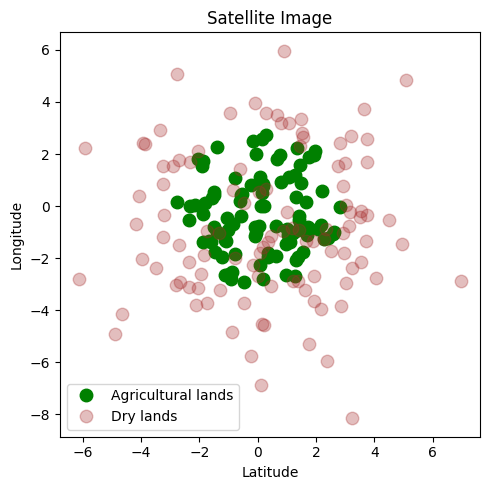

In [4]:
# To visualise the trend, plot the response variables with the predictors (Latitude & Longitude)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Plot the latitude vs longitude values  for y==1
# NOTE: use df[colname][y==1] to get values for 'latitude' & 'longtitude'
   
ax.plot(X["latitude"][y==1], X["longitude"][y==1], 'o',c='green', markersize=9,label='Agricultural lands')

# Repeat the same, but for y==0

ax.plot(X["latitude"][y==0], X["longitude"][y==0], 'o',c='brown', markersize=9,label='Dry lands', alpha=0.3)

# Add labels

ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")

ax.set_title('Satellite Image')

ax.legend()
plt.tight_layout()
plt.show() 

In [5]:
# Split the dataset, with random state = 22

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state=22)

In [6]:
# Make a logistic regression model with below given C value

cval = 1e-5

lr = LogisticRegression(C=cval, max_iter=16000)

# Use Polynomial features to make a response variable of degree 10

degree = 10

X_poly_train = PolynomialFeatures(degree).fit_transform(X_train)

X_poly_val = PolynomialFeatures(degree).fit_transform(X_val)

In [7]:
### edTest(test_accuracy) ###

# Fit the model with training data 

lr.fit(X_poly_train, y_train)

# Make predictions on the validation data

y_val_pred = lr.predict(X_poly_val)

validation_accuracy = accuracy_score(y_val, y_val_pred)

print("Accuracy=",validation_accuracy)

Accuracy= 0.75


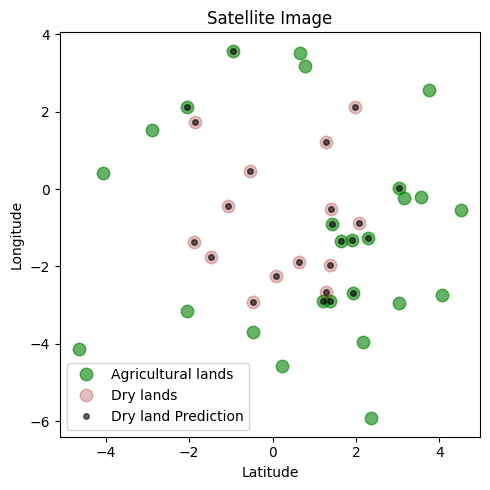

In [8]:
# Use the below helper code to visualise the number of dry land predictions our model got correct

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

xlat_0 = X_val.values[y_val==0,0]
xlong_0 = X_val.values[y_val==0,1]

ax.plot(xlat_0, xlong_0, 'o',c='green',alpha = 0.6, markersize=9,label='Agricultural lands')

xlat_1 = X_val.values[y_val==1,0]
xlong_1 = X_val.values[y_val==1,1]

ax.plot(xlat_1, xlong_1, 'o',c='brown', markersize=9,label='Dry lands', alpha=0.3)

xlat_pred_1 = X_val.values[y_val_pred==1,0]
xlong_pred_1 = X_val.values[y_val_pred==1,1]
ax.plot(xlat_pred_1, xlong_pred_1, 'o',c='black', alpha = 0.6, markersize=4,label='Dry land Prediction')


ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_title('Satellite Image')

ax.legend()
plt.tight_layout()
plt.show() 

## Visualising the data

For the section below, run the code to visualise the boundary for the predictions on a randomly generated gaussian data

In [9]:
new_data = np.random.multivariate_normal([0, 0], np.eye(2) * 3, size=200)
new_data = np.random.multivariate_normal([0, 0], np.array([[1,0.5],
                                                           [0.5,1]]) * 3, size=200)
new_data = np.hstack((new_data, np.zeros((200, 1))))
new_data[new_data[:, 0]**2 + new_data[:, 1]**2 < 3**2, 2] = np.random.choice([0, 1], len(new_data[new_data[:, 0]**2 + new_data[:, 1]**2 < 3**2]), p=[0.2, 0.8])

X = new_data[:, :-1]
y = new_data[:, -1]

y.max()

np.float64(1.0)

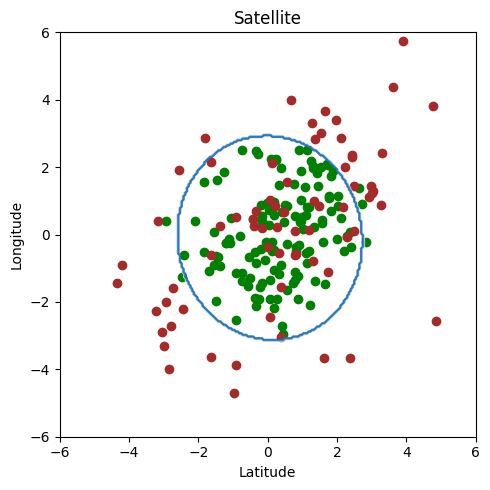

In [12]:
# We will use a custom function called fit_and_plot_dt
# If you are curious about it, look for the file `helper.py` in the root directory

from helper import fit_and_plot_dt

fig, ax = plt.subplots(figsize=(5, 5))

# Choose the C_value and the degree of the polynomial for the polynomial logistic regression
# A C value of 1e15 is extremely large and the equivalent of no regularization  

C_value = 1e15

degree = 2

# The helper function below

ax = fit_and_plot_dt(X, y, C_value, 'Satellite',ax, plot_data=True, fill=False,degree=degree) 

# Setting the limits to better visualsize the plot

ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

plt.tight_layout()
plt.show() 

## ⏸ Take a moment to consider your results 
Play around with the `degree` of the polynomial and C values.

Based on your observations, answer the questions below:

- How does the plot change with varying `degree` and regularization?

- With high values of `degree` do you see more complicated contours?

- Does a more complicated plot suggest *overfitting* or *underfitting*?